# GRU for time series prediction

____________________


In this notebook, we will demonstrate how to use Gated Recurrent Units(GRU) neural networks for time sereis prediction.

In [11]:
# Required Libraries 

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import tensorflow as tf 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import GRU, Dense
from sklearn.preprocessing import MinMaxScaler

### Data Preparation 

First, let's load adn visulaixze the Airline Passengers dataset

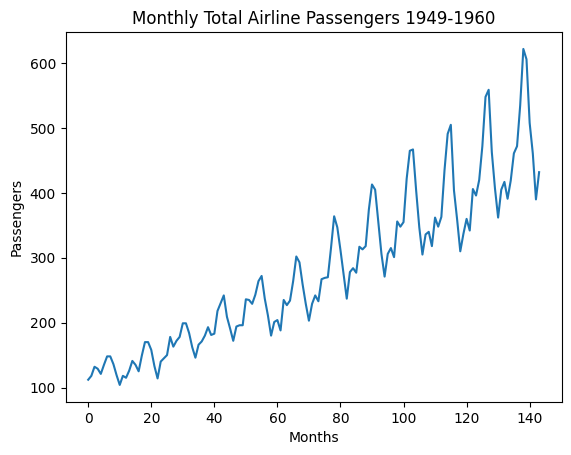

In [12]:
# Load dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv"
dataframe = pd.read_csv(url, usecols=[1], engine='python')
plt.plot(dataframe)
plt.xlabel("Months")
plt.ylabel("Passengers")
plt.title("Monthly Total Airline Passengers 1949-1960")
plt.show()

## Data Preprocessing
Before training a GRU model, we need to preprocess our data. This involves scaling our data and converting it into the right shape.

In [13]:
# Normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataframe.values.astype('float32'))

# Split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

## Create Dataset Matrix
This utility function creates a dataset matrix. Given data, and choosing a certain time step, it will create input-output pairs.

In [14]:
def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

# Reshape into X=t and Y=t+1, choosing a timestep of 3
look_back = 3
X_train, y_train = create_dataset(train, look_back)
X_test, y_test = create_dataset(test, look_back)

# Reshape input to be [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

## GRU Model Building & Training

In [15]:
# Create and fit the GRU network
model = Sequential()
model.add(GRU(4, input_shape=(look_back, 1)))  # Change LSTM to GRU here
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, y_train, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
92/92 - 2s - loss: 0.0161 - 2s/epoch - 19ms/step
Epoch 2/100
92/92 - 0s - loss: 0.0082 - 154ms/epoch - 2ms/step
Epoch 3/100
92/92 - 0s - loss: 0.0064 - 156ms/epoch - 2ms/step
Epoch 4/100
92/92 - 0s - loss: 0.0054 - 153ms/epoch - 2ms/step
Epoch 5/100
92/92 - 0s - loss: 0.0045 - 155ms/epoch - 2ms/step
Epoch 6/100
92/92 - 0s - loss: 0.0042 - 152ms/epoch - 2ms/step
Epoch 7/100
92/92 - 0s - loss: 0.0037 - 151ms/epoch - 2ms/step
Epoch 8/100
92/92 - 0s - loss: 0.0035 - 152ms/epoch - 2ms/step
Epoch 9/100
92/92 - 0s - loss: 0.0033 - 155ms/epoch - 2ms/step
Epoch 10/100
92/92 - 0s - loss: 0.0036 - 168ms/epoch - 2ms/step
Epoch 11/100
92/92 - 0s - loss: 0.0033 - 190ms/epoch - 2ms/step
Epoch 12/100
92/92 - 0s - loss: 0.0034 - 167ms/epoch - 2ms/step
Epoch 13/100
92/92 - 0s - loss: 0.0031 - 158ms/epoch - 2ms/step
Epoch 14/100
92/92 - 0s - loss: 0.0032 - 156ms/epoch - 2ms/step
Epoch 15/100
92/92 - 0s - loss: 0.0031 - 160ms/epoch - 2ms/step
Epoch 16/100
92/92 - 0s - loss: 0.0030 - 159ms/epoc

## Visualizing Predictions

In [16]:
# Shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# Shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

# Plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset), label="True data")
plt.plot(trainPredictPlot, label="Train Predictions")
plt.plot(testPredictPlot, label="Test Predictions")
plt.xlabel("Months")
plt.ylabel("Passengers")
plt.title("GRU's Prediction of Airline Passengers")
plt.legend()
plt.show()

NameError: name 'trainPredict' is not defined